# Model Building 

## Load Libraries & Data

In [1]:
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
import pandas as pd

In [2]:
transaction_df = pd.read_csv("Cleaned_data.csv")

In [3]:
transaction_df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,year,month,day,hour,minute,day_of_week,week_of_year,day_of_year,payment_attempt,is_PSP_changed,diff_in_secs,server_load,isof_flag
0,2019-01-01 00:28:56,Switzerland,277,1,Goldcard,0,Diners,2019,1,1,0,28,1,1,1,1,0,0,NaN,-1
1,2019-01-01 00:41:43,Austria,34,0,Goldcard,0,Visa,2019,1,1,0,41,1,1,1,3,1,18,1.0,-1
2,2019-01-01 01:01:46,Germany,257,0,Goldcard,1,Master,2019,1,1,1,1,1,1,1,2,1,2,1.0,1
3,2019-01-01 01:19:43,Germany,310,0,Goldcard,0,Visa,2019,1,1,1,19,1,1,1,1,0,0,1.0,1
4,2019-01-01 01:36:57,Germany,192,0,Goldcard,1,Diners,2019,1,1,1,36,1,1,1,1,1,0,1.0,1


In [4]:
transaction_df.columns

Index(['tmsp', 'country', 'amount', 'success', 'PSP', '3D_secured', 'card',
       'year', 'month', 'day', 'hour', 'minute', 'day_of_week', 'week_of_year',
       'day_of_year', 'payment_attempt', 'is_PSP_changed', 'diff_in_secs',
       'server_load', 'isof_flag'],
      dtype='object')

## Identify feature types

In [5]:
# Category columns 

cat_cols = ['country', 'PSP', 'card','isof_flag','is_PSP_changed']
num_cols = ['amount', 'month','day', 'hour', 'minute','day_of_week','week_of_year','day_of_year', 
            'payment_attempt','diff_in_secs']
target_col = 'success'

In [6]:
x_feats = cat_cols + num_cols

## Train Test Split

In [7]:
# Train Test Split
stratify_cols = ['PSP','success']
X_train, X_test, y_train, y_test = train_test_split(transaction_df[x_feats], transaction_df[target_col], test_size=0.15, random_state=42,stratify=transaction_df[stratify_cols])


In [8]:
# Calculate scale_pos_weight

scale_pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1]

scale_pos_weight

3.9284564067172765

In [9]:
## Model Selection

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


clf_models_dict = {
                   "CatBoost": CatBoostClassifier(random_state=42, verbose=0,cat_features=cat_cols,auto_class_weights='Balanced',iterations=300,early_stopping_rounds=10),
                   "XGBoost": XGBClassifier(random_state=42, tree_method='hist',enable_categorical=True,scale_pos_weight=scale_pos_weight),
                   "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced'),
                   "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42,class_weight='balanced'),
                   "LogisticRegression": LogisticRegression(random_state=42,class_weight='balanced'),
                   "MLP": MLPClassifier(random_state=42),
                   "LGBM": LGBMClassifier(random_state=42,verbose=-1)
                   
                   }

Building with  CatBoost
Model Name: CatBoost
Training ROC AUC Score: 0.65
Test ROC AUC Score: 0.65
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      6028
           1       0.29      0.60      0.39      1534

    accuracy                           0.62      7562
   macro avg       0.57      0.61      0.55      7562
weighted avg       0.74      0.62      0.65      7562

Test F1 Score :0.38890056758461217
Building with  XGBoost
Model Name: XGBoost
Training ROC AUC Score: 0.63
Test ROC AUC Score: 0.64
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      6028
           1       0.30      0.51      0.37      1534

    accuracy                           0.65      7562
   macro avg       0.57      0.60      0.57      7562
weighted avg       0.74      0.65      0.68      7562

Test F1 Score :0.37482048827190045
Building with  RandomForest
Model Name: RandomForest
Training ROC AUC Score: 0.6

d:\ProgramData\anaconda3\envs\mlcpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ProgramData\anaconda3\envs\mlcpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Name: MLP
Training ROC AUC Score: 0.61
Test ROC AUC Score: 0.61
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      6028
           1       0.49      0.05      0.09      1534

    accuracy                           0.80      7562
   macro avg       0.65      0.52      0.49      7562
weighted avg       0.74      0.80      0.72      7562

Test F1 Score :0.09422850412249706
Building with  LGBM
Model Name: LGBM
Training ROC AUC Score: 0.67
Test ROC AUC Score: 0.66
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      6028
           1       0.55      0.04      0.08      1534

    accuracy                           0.80      7562
   macro avg       0.68      0.52      0.48      7562
weighted avg       0.75      0.80      0.72      7562

Test F1 Score :0.07757575757575758
CatBoost: 0.65
XGBoost: 0.63
RandomForest: 0.63
ExtraTrees: 0.60
LogisticRegression: 0.61
MLP: 0.61
LGBM: 0.67


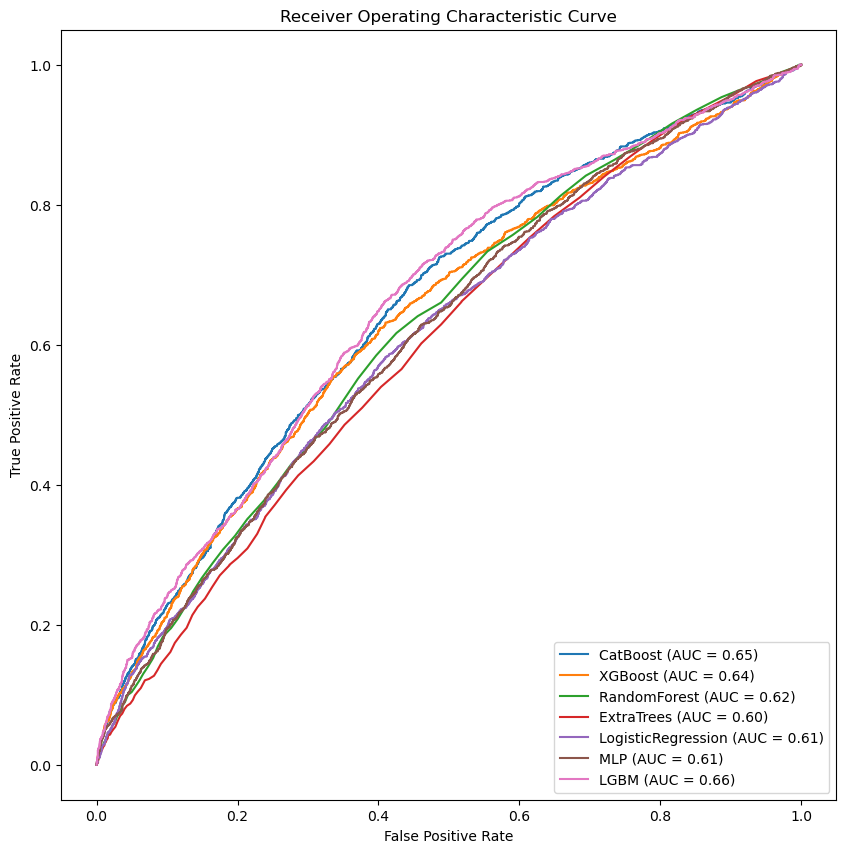

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

# Initialize a figure for the ROC curves
plt.figure(figsize=(10, 10))
results = {}
for model_name, model_func in clf_models_dict.items():

    if model_name in ["RandomForest", "ExtraTrees", "LogisticRegression", "MLP"]:
        # Convert categorical columns to one-hot encoding and normalize numerical columns
        oh_encoder = ce.OneHotEncoder(cols=cat_cols)
        X_train1 = oh_encoder.fit_transform(X_train)
        X_test1 = oh_encoder.transform(X_test)

        # Normalize the numerical columns
        scaler = StandardScaler()
        X_train_norm = scaler.fit_transform(X_train1)
        X_test_norm = scaler.transform(X_test1)

    else:
        for col in cat_cols:
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')
        X_train_norm = X_train
        X_test_norm = X_test

    print("Building with ", model_name)
    model = model_func
    # Compute cross-validation score
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(model_func, X_train_norm, y_train, cv=stratified_kfold, scoring='roc_auc')

    # Save the cross-validation score in the results dictionary
    results[model_name] = cv_score.mean()

    # Fit the model and compute ROC curve
    model.fit(X_train_norm, y_train)
    y_score = model.predict_proba(X_test_norm)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)

    # Print Report
    print(f'Model Name: {model_name}')
    print(f'Training ROC AUC Score: {cv_score.mean():.2f}')
    print(f'Test ROC AUC Score: {roc_auc:.2f}')
    print(classification_report(y_test, model.predict(X_test_norm)))
    print(f'Test F1 Score :{f1_score(y_test, model.predict(X_test_norm))}')

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Print the results
for model_name, cv_score in results.items():
    print(f'{model_name}: {cv_score:.2f}')

# Finalize the ROC curves plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Model Selection: 

-  Catboost, XGBoost and LGBM have similar better performance over the other models. Since catboost offers more features and is more robust, we will use catboost for the final model for fine tunings. 

## Feature selection. 

- Out of available features, choose the best features contributing to model. 

In [11]:
# Select features using catboost using select_features
import catboost
from catboost import Pool
from catboost import CatBoostRegressor, EShapCalcType, EFeaturesSelectionAlgorithm

train_pool = Pool(data=X_train, label=y_train, cat_features=cat_cols)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_cols)


def select_features_syntetic(algorithm: EFeaturesSelectionAlgorithm, steps: int = 1):
    print('Algorithm:', algorithm)
    model = CatBoostRegressor(iterations=1000, random_seed=0)
    summary = model.select_features(
        train_pool,
        eval_set=test_pool,
        features_for_select=list(range(X_train.shape[1])),     # we will select from all features
        num_features_to_select=7,  # we want to select exactly important features
        steps=steps,                                     # more steps - more accurate selection
        algorithm=algorithm,
        shap_calc_type=EShapCalcType.Regular,            # can be Approximate, Regular and Exact
        train_final_model=True,                          # to train model with selected features
        logging_level='Silent',
        plot=True
    )
    return summary

In [12]:
# Choose the best features selection algorithm

summary = select_features_syntetic(EFeaturesSelectionAlgorithm.RecursiveByShapValues)

Algorithm: EFeaturesSelectionAlgorithm.RecursiveByShapValues


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [13]:
# Selected features 

selected_feat_names = X_train.columns[summary['selected_features']]

selected_feat_names

Index(['PSP', 'card', 'isof_flag', 'amount', 'day', 'hour', 'day_of_week'], dtype='object')

In [14]:
selected_cat_cols = ["PSP","card","isof_flag"]

In [15]:
X_train = X_train[selected_feat_names]

In [16]:
# Finetune Catboost with selected features

import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score


def objective(trail):
    params = {
        'iterations': 1000,
        'depth': trail.suggest_int('depth', 4, 10),
        'learning_rate': trail.suggest_float('learning_rate', 1e-3, 1e-1,log=True),
        'l2_leaf_reg': trail.suggest_float('l2_leaf_reg', 1e-3, 1e-1,log=True),
        'border_count': trail.suggest_int('border_count', 32, 255),
        'bagging_temperature': trail.suggest_float('bagging_temperature', 1e-3, 1e3,log=True),
        'auto_class_weights': 'Balanced',
        'cat_features': selected_cat_cols,
        'verbose': 0
    }

    model = CatBoostClassifier(**params, loss_function='Logloss', eval_metric='F1')

    model.fit(X_train, y_train, eval_set=(X_test[X_train.columns], y_test), early_stopping_rounds=30, verbose=0)

    # evaluate with F1 score
    y_pred = model.predict(X_test[X_train.columns])
    f1 = f1_score(y_test, y_pred)

    return f1
   


In [17]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-04-24 07:11:01,205] A new study created in memory with name: no-name-e1e21e69-efb1-468b-916e-cd0cfcceea06
[I 2024-04-24 07:11:04,909] Trial 0 finished with value: 0.40559440559440557 and parameters: {'depth': 6, 'learning_rate': 0.09845795209677062, 'l2_leaf_reg': 0.0028933471168838833, 'border_count': 202, 'bagging_temperature': 0.0023099965842471124}. Best is trial 0 with value: 0.40559440559440557.
[I 2024-04-24 07:11:06,399] Trial 1 finished with value: 0.38385752178855626 and parameters: {'depth': 6, 'learning_rate': 0.014395980037735626, 'l2_leaf_reg': 0.08673139488543305, 'border_count': 109, 'bagging_temperature': 5.999356455626565}. Best is trial 0 with value: 0.40559440559440557.
[I 2024-04-24 07:11:07,967] Trial 2 finished with value: 0.3728027815337068 and parameters: {'depth': 6, 'learning_rate': 0.011729043050482665, 'l2_leaf_reg': 0.00771489346476008, 'border_count': 232, 'bagging_temperature': 20.976171053837255}. Best is trial 0 with value: 0.40559440559440557.

In [21]:
# Best Param and save the best model 

best_params = study.best_params
print("Best Params", best_params)

best_model = CatBoostClassifier(**best_params, loss_function='Logloss', eval_metric='F1',cat_features=selected_cat_cols, auto_class_weights='Balanced',iterations=1000)
best_model.fit(X_train, y_train, eval_set=(X_test[X_train.columns], y_test), early_stopping_rounds=30, verbose=0)

# Save the model
best_model.save_model("best_model.cbm")


Best Params {'depth': 9, 'learning_rate': 0.0602316495918075, 'l2_leaf_reg': 0.0018478787432004175, 'border_count': 36, 'bagging_temperature': 89.83422315155548}


In [22]:
# Load the best model 

best_model = CatBoostClassifier()
best_model.load_model("models/best_model.cbm")


In [23]:
# Print the classification report

print(classification_report(y_test, best_model.predict(X_test[selected_feat_names])))
print("F1 Score", f1_score(y_test, best_model.predict(X_test[selected_feat_names])))
print("Accuracy", accuracy_score(y_test, best_model.predict(X_test[selected_feat_names])))
print("Confusion Matrix", confusion_matrix(y_test, best_model.predict(X_test[selected_feat_names])))
print("ROC AUC", roc_auc_score(y_test, best_model.predict_proba(X_test[selected_feat_names])[:, 1]))



              precision    recall  f1-score   support

           0       0.88      0.55      0.68      6028
           1       0.29      0.71      0.41      1534

    accuracy                           0.59      7562
   macro avg       0.59      0.63      0.55      7562
weighted avg       0.76      0.59      0.63      7562

F1 Score 0.41159856900771985
Accuracy 0.5867495371594816
Confusion Matrix [[3344 2684]
 [ 441 1093]]
ROC AUC 0.6550083205795811
